In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

cwd = Path.cwd().joinpath("ps_results", "figures")
cwd.mkdir(exist_ok=True)
os.chdir(cwd)

# Set global parameters
plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [
    6.4,
    3.2,
]  # Default figure size (width, height) in inches
mpl.rcParams["font.size"] = 12  # Default font size in points
mpl.rcParams["legend.fontsize"] = 12  # Default legend font size in points
mpl.rcParams["axes.labelsize"] = 12  # Default axes label font size in points
mpl.rcParams["xtick.labelsize"] = 12  # Default x-tick label font size in points
mpl.rcParams["ytick.labelsize"] = 12  # Default y-tick label font size in points

# Set seaborn style and context
sns.set(style="whitegrid")
sns.set_context(
    "notebook",
    font_scale=1.0,
    rc={
        "figure.figsize": [6.4, 3.2],
        "font.size": 12,
        "legend.fontsize": 12,
        "axes.labelsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    },
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/q2/vz7jnmc10zj3rbdv4x8nfjjr0000gn/T/ipykernel_70923/1991617114.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Figure utilities

In [2]:
from figures_utils import (
    method_color_map,
    method_hatch_map,
    setup_rename_map,
    method_rename_map,
    rename_map,
    model_order,
    newmain_method_order,
    base_method_order,
    transfer_method_order,
    nomi_transfer_method_order,
    nomi_corr_transfer_method_order,
    category_order,
    cls_category_order,
    task_order,
    porder,
    cali_type_order,
    combn_order,
    line_order,
    filter_dataframe,
    read_ps_dict,
    read_ps_dicts,
    get_for_baseline,
    get_add_lines_fn,
    get_line_matrix_dict,
    draw_simple_bar,
    draw_bar,
    get_matrix,
    get_matrix_for_table,
    get_metric_dict,
    combn_hatch_map,
    draw_simple_heatmap,
    draw_heatmap,
    line_items,
)

# Figure 1

## (a) Prompt Selection

F1 of the prompts selected by different probability-based prompt selection methods, averaged across 13 datasets. The methods without super/subscripts are the existing methods (Table 1), while those with super/subscripts are our proposed methods (Table 4 & Equation 1).

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_1_prompt_selection_f1.pdf


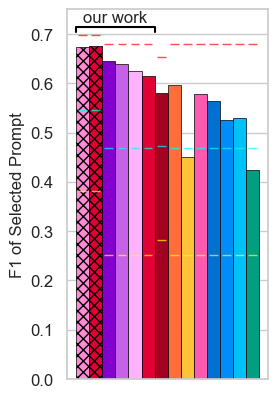

figure_1_prompt_selection_legend.pdf


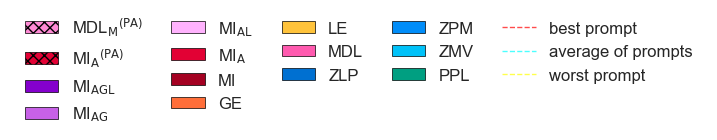

In [3]:
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = newmain_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=False,
)


def _get_line_matrix_dict(df):
    matrix_dict = dict()
    for method in ["BEST", "MEAN", "WORST"]:
        matrix_dict[method] = (
            df.groupby("method")[[f"acc_{method}", f"f1_{method}"]]
            .mean()
            .T[method_order]
        )
        matrix_dict[method].index = porder
    return matrix_dict


matrix = df.groupby("method")[porder].mean().T[method_order]
line_dict = _get_line_matrix_dict(df)

line_dict = {k: v for k, v in line_dict.items()}

add_lines = True
bar_width = 0.05
method_axis = "columns"
color_fn = lambda idx, col: method_color_map[col]
hatch_fn = lambda idx, col: method_hatch_map[col]
add_lines_fn = get_add_lines_fn(color_fn, bar_width, method_axis, add_lines)

options = dict(
    df=None,
    pname="f1",
    matrix=matrix,
    line_dict=line_dict,
    bar_width=bar_width,
    legend_width=9,
    xlabel="",
    index_order=["f1"],
    column_order=method_order,
    columns="method",
    index="category",
    method_axis=method_axis,
    color_fn=color_fn,
    hatch_fn=hatch_fn,
    title="",
    add_lines=True,
    ylim=(0.0, 0.75),
    add_lines_fn=add_lines_fn,
    figsize=(2.6, 4.8),
    figname="figure_1_prompt_selection",
    legend_rows=5,
    num_columns=5,
    no_legend=False,
)
draw_simple_bar(**options, special=["-LEc", "MI"])

## (b) Answer Selection

Ratio of the prompts (out of 100) whose F1 on each dataset improves by applying probability calibration for answer selection, averaged across 10 models. Our proposed calibration method, CBM (Equation 1), is considerably more effective than CC and PMI_DC (Table 5) in enhancing the answer selection performance of the prompts.

ours


['opt66b' 'opt2.7b' 'opt30b' 'gpt-neo2.7b' 'bloom3b' 'opt1.3b' 'gpt1.5b'
 'gpt-j6b' 'opt6.7b' 'gpt-neo1.3b']
pmi
['opt66b' 'opt30b' 'gpt-neo1.3b' 'bloom3b' 'gpt-neo2.7b' 'gpt-j6b'
 'opt2.7b' 'opt6.7b' 'gpt1.5b' 'opt1.3b']
cbu
['gpt-j6b' 'gpt1.5b' 'bloom3b' 'opt6.7b' 'gpt-neo1.3b' 'opt30b'
 'gpt-neo2.7b' 'opt1.3b' 'opt2.7b' 'opt66b']
['opt2.7b']
figure_1_answer_selection_None.pdf


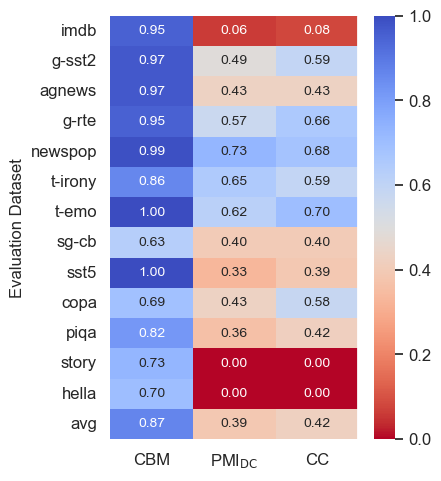

In [4]:
sanities = []
for cali_type in cali_type_order:
    print(cali_type)
    option = {
        "setup": "v1",
        "cali_type": cali_type,
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
    _metric_dict = get_metric_dict(option)
    columns = [
        "model",
        "task",
        "prompt",
        "category",
        "setup",
        "cali_type",
        "cali_norm_type",
        "do_filter",
    ]
    nn = filter_dataframe(_metric_dict["metric"], {"combn": "NN"}).drop(
        "combn", axis=1
    )[columns + ["acc", "f1"]]
    nc = filter_dataframe(_metric_dict["metric"], {"combn": "NC"}).drop(
        "combn", axis=1
    )[columns + ["acc", "f1"]]
    sanity = nn.merge(nc, on=columns)
    sanity["acc_better"] = sanity["acc_x"] < sanity["acc_y"]
    sanity["f1_better"] = sanity["f1_x"] < sanity["f1_y"]

    sanity = filter_dataframe(sanity, no_udynamic=True)
    sanities.append(sanity)
    print(sanity["model"].unique())

one_sanity = pd.concat(sanities)
matrixes = []

for pname in ["f1_better"]:
    df = filter_dataframe(one_sanity, {"model": "opt2.7b"})
    print(df["model"].unique())
    matrixes.append(
        df.groupby(["task", "cali_type"])[pname].mean().unstack()[cali_type_order]
    )
matrix = pd.concat(matrixes, axis=1)

column_order_here = []
rename_map_here = rename_map.copy()

for pname in ["f1"]:
    for cali_type in cali_type_order:
        name = f"{pname}_{cali_type}"
        column_order_here.append(name)
        rename_map_here[name] = f"{rename_map[cali_type]}"

matrix.columns = column_order_here
matrix.loc["avg", :] = matrix.mean(axis=0)
matrix = matrix[column_order_here].transpose()[task_order + ["avg"]].transpose()

draw_simple_heatmap(
    matrix,
    pname=None,
    higher_better=True,
    annot_size=10,
    index_order=task_order + ["avg"],
    column_order=column_order_here,
    xlabel="",
    ylabel="task",
    title="",
    figname=f"figure_1_answer_selection",
    cmap="coolwarm_r",
    rename_map=rename_map_here,
    axvlines=[3],
    figsize=(4, 5.5),
    vmin_vmax=(0, 1),
)

# Figure 2

F1 of the prompts selected by the existing probability-based prompt selection methods, averaged for each dataset category, with the task average also shown.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_2_f1.pdf


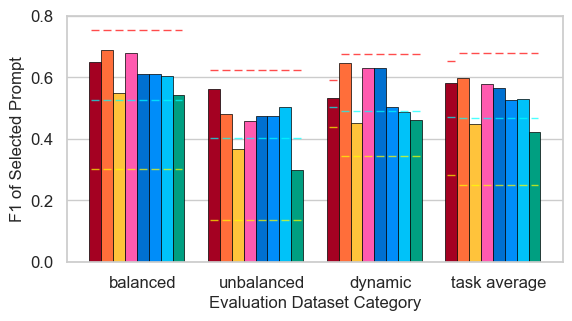

figure_2_legend.pdf


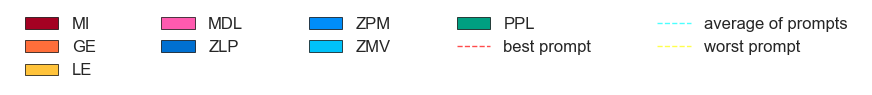

['balanced', 'unbalanced', 'dynamic', 'task average']
['MI', 'GE_D', 'LE', '-LE_I', 'ELP', 'EPM', 'EMV', '-PPL']


F1 of Selected Prompt                                          \
category              balanced          unbalanced             dynamic   
method                                                                   
MI                      0.6504     \textbf{0.5615}              0.5336   
GE             \textbf{0.6889}              0.4818     \textbf{0.6474}   
LE                      0.5499              0.3687              0.4510   
MDL         \underline{0.6798}              0.4586  \underline{0.6297}   
ZLP                     0.6110              0.4747              0.6289   
ZPM                     0.6110              0.4747              0.5023   
ZMV                     0.6048  \underline{0.5040}              0.4889   
PPL                     0.5416              0.2977              0.4629   

                              
category        task average  
method                        
MI        \underline{0.5803}  
GE           \textbf{0.5965}  
LE                    0.4498  
MDL                   0.5793  
ZLP                   0.5641  
ZPM                   0.5251  
ZMV                   0.5304  
PPL                   0.4236

In [5]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = base_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=True,
)

options = dict(
    df=df,
    bar_width=0.1,
    legend_width=11,
    xlabel="category",
    index_order=category_order + ["task average"],
    column_order=method_order,
    columns="method",
    index="category",
    method_axis="columns",
    color_fn=lambda idx, col: method_color_map[col],
    hatch_fn=lambda idx, col: method_hatch_map[col],
    title="",
    add_lines=True,
    pnames=["f1"],
    figsize=(6.4, 3.2),
    figname="figure_2",
)
draw_bar(**options)
matrix = get_matrix_for_table(concat_axis=0, **options)
matrix

# Figure 4

F1 of the prompts selected by MI_A and MI, averaged for each setup of a different number of tokens of verbalizers and evaluation dataset category. |v| denotes the number of tokens of the verbalizers.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=v12__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=v2__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_4_f1.pdf


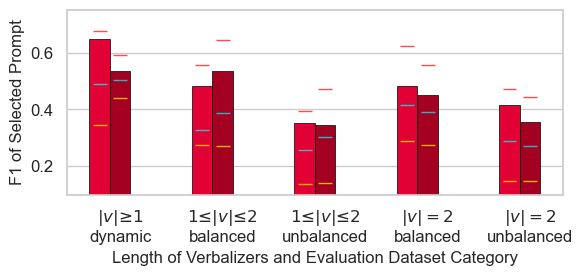

figure_4_legend.pdf


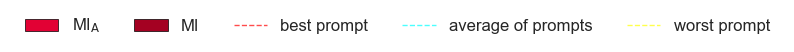

In [6]:
index_order_here = []
rename_map_here = setup_rename_map | method_rename_map

for setup in ["v1", "v12", "v2"]:
    if setup in ["v12", "v2"]:
        task_order_here = cls_category_order
    else:
        task_order_here = ["dynamic"]
    for task in task_order_here:
        index_here = f"{setup}_{task}"
        index_order_here.append(index_here)
        if setup == "v1":
            rename_map_here[index_here] = f"$|v|≥1$\n{rename_map[task]}"
        else:
            rename_map_here[index_here] = f"{rename_map[setup]}\n{rename_map[task]}"

ps_dict = read_ps_dicts(
    [
        {
            "setup": "v1",
            "cali_type": "ours",
            "cali_norm_type": "softmax",
            "do_filter": False,
        },
        {
            "setup": "v12",
            "cali_type": "ours",
            "cali_norm_type": "softmax",
            "do_filter": False,
        },
        {
            "setup": "v2",
            "cali_type": "ours",
            "cali_norm_type": "softmax",
            "do_filter": False,
        },
    ]
)

no_udynamic = True
add_task_average = False
only_nn = True
method_order = ["MIa", "MI"]
pname = "f1"

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=only_nn,
)
df = filter_dataframe(
    df, filters=[(df["setup"].isin(["v12", "v2"])) | (df["category"] == "dynamic")]
)
matrix = get_matrix(df, pname, index="setup,category", columns="method")
line_dict = get_line_matrix_dict(
    df, pname, get_matrix_fn=get_matrix, index="setup,category", columns="method"
)

add_lines = True
bar_width = 0.2
method_axis = "columns"
color_fn = lambda idx, col: method_color_map[col]
hatch_fn = lambda idx, col: method_hatch_map[col]
add_lines_fn = get_add_lines_fn(color_fn, bar_width, method_axis, add_lines)

options = dict(
    df=None,
    pname=pname,
    matrix=matrix,
    rename_map=rename_map_here,
    line_dict=line_dict,
    bar_width=bar_width,
    legend_width=10,
    xlabel="Length of Verbalizers and Evaluation Dataset Category",
    index_order=index_order_here,
    column_order=method_order,
    columns="method",
    index="category",
    method_axis=method_axis,
    color_fn=color_fn,
    hatch_fn=hatch_fn,
    title="",
    add_lines=add_lines,
    add_lines_fn=add_lines_fn,
    figsize=(6.4, 2.4),
    figname="figure_4",
    ylim=(0.1, 0.75),
)
draw_simple_bar(**options)

# Figure 5

F1 of the prompts selected by different probability-based prompt selection methods, averaged for each dataset category, with the task average also shown. The methods with subscripts are the combinational variants proposed in this subsection, whose Prompt Selection Scores are shown in Table 4 . The methods with subscript **M** are combinational variants that use the component of **<u>M</u>I**; the methods with **L** perform instance-wise prompt selection like **MD<u>L</u>**; the methods with **G** utilize one-hot $p(y|x, t)$ like **<u>G</u>E**. The methods with **A** use **<u>A</u>ll** tokens to calculate $p(y|x, t)$.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_5_f1.pdf


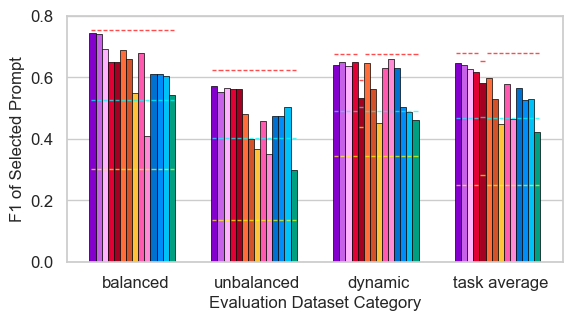

figure_5_legend.pdf


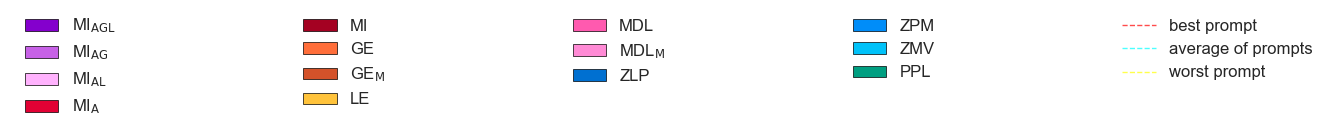

In [7]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=True,
)

options = dict(
    df=df,
    bar_width=0.05,
    legend_width=17,
    xlabel="category",
    index_order=category_order + ["task average"],
    column_order=method_order,
    columns="method",
    index="category",
    method_axis="columns",
    color_fn=lambda idx, col: method_color_map[col],
    hatch_fn=lambda idx, col: method_hatch_map[col],
    title="",
    add_lines=True,
    pnames=["f1"],
    figsize=(6.4, 3.2),
    figname="figure_5",
)
draw_bar(**options)
# matrix = get_matrix_for_table(concat_axis=0, **options)
# matrix

# Figure 6

F1 of the prompts selected by different probability-based prompt selection methods, averaged across 13 datasets, for each scenario of CBM calibration.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_6_f1.pdf


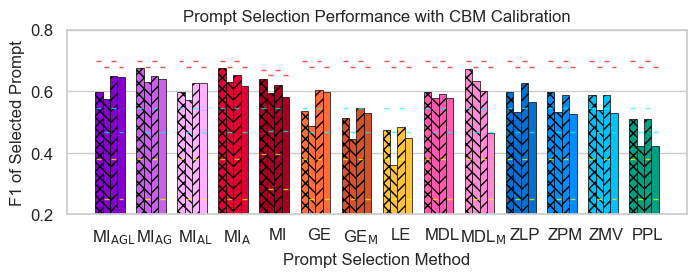

['MI_DI', 'MI_D', 'MI_I', 'MIa', 'MI', 'GE_D', 'GE', 'LE', '-LE_I', '-LE', 'ELP', 'EPM', 'EMV', '-PPL']
['CC', 'CN', 'NC', 'NN']
figure_6_legend.pdf


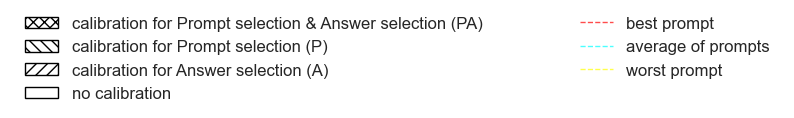

In [8]:
from matplotlib.patches import Patch

cali_type = "ours"
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": cali_type,
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=False,
)

options = dict(
    df=df,
    bar_width=0.18,
    legend_width=17,
    xlabel="method",
    index_order=method_order,
    column_order=combn_order,
    columns="combn",
    index="method",
    method_axis="index",
    color_fn=lambda idx, col: method_color_map[idx],
    hatch_fn=lambda idx, col: combn_hatch_map[col],
    title=f"Prompt Selection Performance with {rename_map[cali_type]} Calibration",
    add_lines=True,
    pnames=["f1"],
    figsize=(8, 2.4),
    ylim=(0.2, 0.8),
    figname=f"figure_6",
)
draw_bar(**options, no_legend=True)
matrix = get_matrix_for_table(concat_axis=0, **options)
matrix.T

legend_elements = [
    Patch(
        facecolor="white",
        edgecolor="black",
        hatch=combn_hatch_map[combn],
        label=rename_map[combn],
    )
    for combn in combn_order
] + line_items

# Create a new figure for the legend
fig_leg = plt.figure(figsize=(10, 0.1))
ax_leg = fig_leg.add_subplot(111)

# Make the new axes invisible
ax_leg.axis("off")

# Add the legend to the new figure
legend_items = legend_elements
legend_labels = [rename_map[combn] for combn in combn_order] + [
    rename_map.get(m, m) for m in line_order
]
num_columns = 2
leg = ax_leg.legend(
    legend_items, legend_labels, loc="center", ncol=num_columns, mode="expand"
)

# Save the new figure with the legend
figname = "figure_6"
if figname:
    filename = f"{figname}_legend.pdf"
    fig_leg.savefig(filename, format="pdf", bbox_inches="tight")
    print(filename)

# Figure 7

Scaled F1 and correlation of F1 of the selected prompts and Prompt Selection Score of different probability-based prompt selection methods for different models, averaged across 13 datasets.

## (a) Scaled F1

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt1.3b', 'gpt-neo2.7b', 'opt66b', 'opt30b', 'gpt-j6b', 'gpt-neo1.3b', 'gpt1.5b', 'opt6.7b', 'bloom3b', 'opt2.7b'}
figure_7_scaled_f1_f1_to_best.pdf


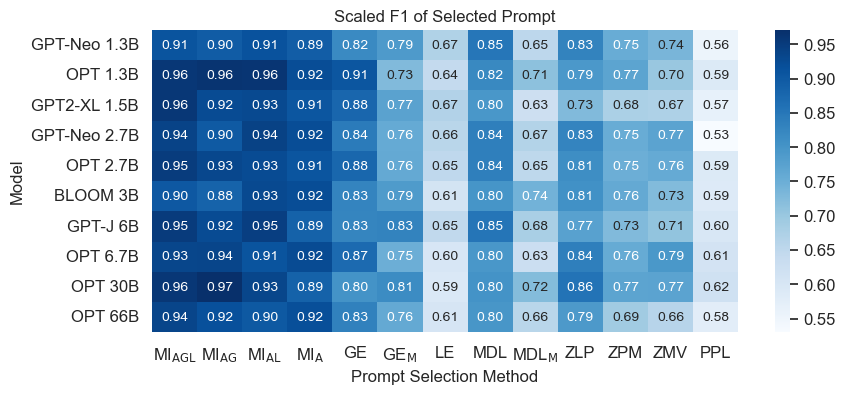

In [9]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = nomi_transfer_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
)

options = dict(
    df=df,
    bar_width=0.11,
    legend_width=11,
    index_order=model_order,
    column_order=method_order,
    columns="method",
    index="model",
    method_axis="columns",
    color_fn=lambda idx, col: method_color_map[col],
    hatch_fn=lambda idx, col: method_hatch_map[col],
    add_lines=True,
    pnames=["f1_to_best"],
    ylim=None,
    figsize=None,
    annot_size=10,
    xlabel="method",
    ylabel="model",
    title=True,
    cmap="Blues",
    figname="figure_7_scaled_f1",
)
draw_heatmap(**options)

## (b) Correlation of F1 of the selected prompts

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt1.3b', 'gpt-neo2.7b', 'opt66b', 'opt30b', 'gpt-j6b', 'gpt-neo1.3b', 'gpt1.5b', 'opt6.7b', 'bloom3b', 'opt2.7b'}
figure_11_f1_corr.pdf


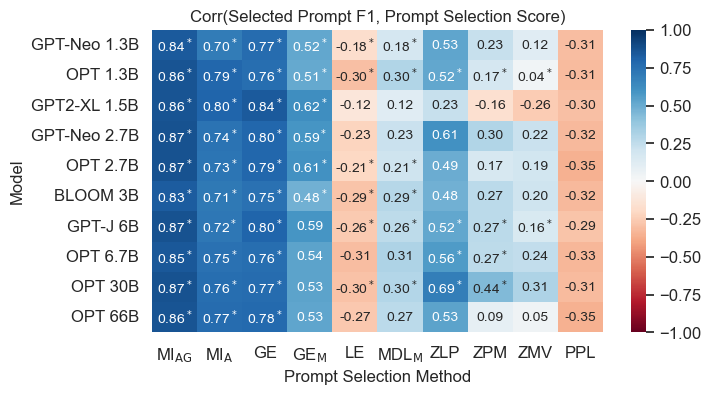

In [10]:
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = nomi_corr_transfer_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
)

options = dict(
    df=df,
    bar_width=0.11,
    legend_width=11,
    index_order=model_order,
    column_order=method_order,
    columns="method",
    index="model",
    method_axis="columns",
    color_fn=lambda idx, col: method_color_map[col],
    hatch_fn=lambda idx, col: method_hatch_map[col],
    add_lines=True,
    pnames=["f1_corr"],
    ylim=None,
    figsize=None,
    annot_size=10,
    xlabel="method",
    ylabel="model",
    title=True,
    figname="figure_11",
    vmin_vmax=(-1, 1),
)
draw_heatmap(**options)

# Figure 8

Mean and standard deviation of prompt selection among five sets of 50 prompts sampled from the full set of 100 prompts.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False__mean=yes.pkl
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False__std=yes.pkl
{'opt2.7b'}
{'opt2.7b'}
figure_8_f1.pdf


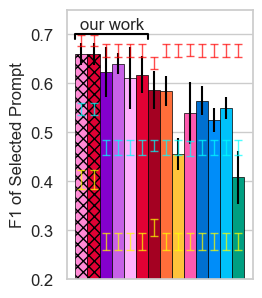

figure_8_legend.pdf


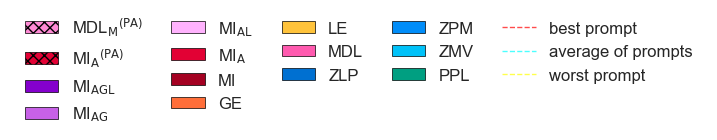

In [11]:
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
        "mean": "yes",
    }
)
std_ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
        "std": "yes",
    }
)
method_order = newmain_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=False,
)
std_df = get_for_baseline(
    std_ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=False,
)


def _get_line_matrix_dict(df):
    matrix_dict = dict()
    for method in ["BEST", "MEAN", "WORST"]:
        matrix_dict[method] = (
            df.groupby("method")[[f"acc_{method}", f"f1_{method}"]]
            .mean()
            .T[method_order]
        )
        matrix_dict[method].index = porder
    return matrix_dict


def custom_get_add_lines_fn(color_fn, bar_width, method_axis, add_lines):
    def add_lines_fn(line_dict, std_line_dict, ax, idx, col, bar_x):
        for line in line_order:
            color_col = line + "_line" if method_axis == "columns" else col
            color_idx = idx if method_axis == "columns" else line + "_line"

            bar_height = line_dict[line].loc[idx, col]
            # ax.hlines(bar_height, bar_x - (bar_width * (1/3)), bar_x + (bar_width * (1/3)), colors=color_fn(color_idx, color_col), linewidth=1, alpha=0.7)
            ax.errorbar(
                bar_x,
                bar_height,
                std_line_dict[line].loc[idx, col],
                color=color_fn(color_idx, color_col),
                marker="",
                ms=4,
                capsize=3,
                linewidth=1,
                alpha=0.7,
            )

    if add_lines:
        return add_lines_fn
    return lambda line_dict, ax, idx, col, bar_x: None


matrix = df.groupby("method")[porder].mean().T[method_order]
std_matrix = std_df.groupby("method")[porder].mean().T[method_order]

matrix = matrix[1:]
std_matrix = std_matrix[1:]

line_dict = _get_line_matrix_dict(df)
line_dict = {k: v for k, v in line_dict.items()}

std_line_dict = _get_line_matrix_dict(std_df)
std_line_dict = {k: v for k, v in std_line_dict.items()}

add_lines = True
bar_width = 0.05
method_axis = "columns"
color_fn = lambda idx, col: method_color_map[col]
hatch_fn = lambda idx, col: method_hatch_map[col]
add_lines_fn = custom_get_add_lines_fn(color_fn, bar_width, method_axis, add_lines)

options = dict(
    df=None,
    pname="f1",
    matrix=matrix,
    line_dict=line_dict,
    bar_width=bar_width,
    legend_width=9,
    xlabel="",
    index_order=["f1"],
    column_order=method_order,
    columns="method",
    index="category",
    method_axis=method_axis,
    color_fn=color_fn,
    hatch_fn=hatch_fn,
    title="",
    add_lines=True,
    ylim=(0.2, 0.75),
    add_lines_fn=add_lines_fn,
    figsize=(2.4, 3.5),
    figname="figure_8",
    legend_rows=5,
    num_columns=5,
    no_legend=False,
    std_matrix=std_matrix,
    std_line_dict=std_line_dict,
)
draw_simple_bar(**options, special=["-LEc", "MI"])

# Figure 9

F1 (top) and accuracy (bottom) of the prompts selected by the different probability-based prompt selection methods, shown for each dataset.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_9_acc.pdf


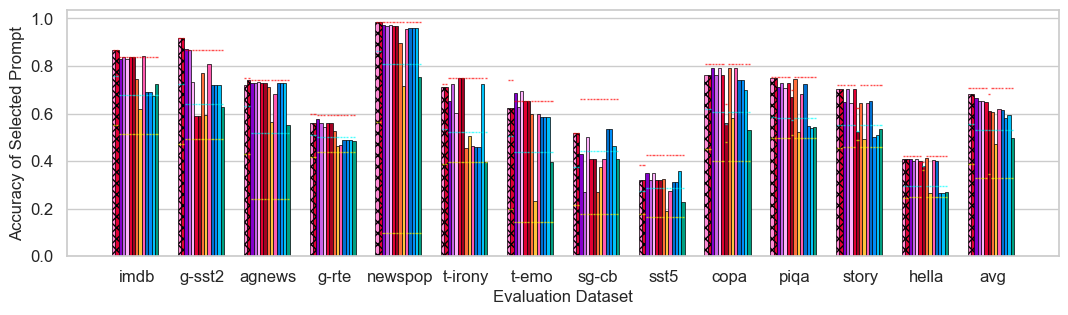

figure_9_legend.pdf


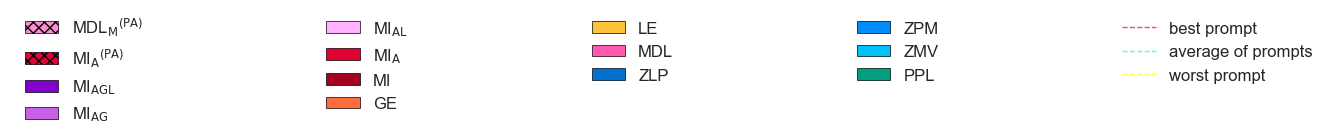

figure_9_f1.pdf


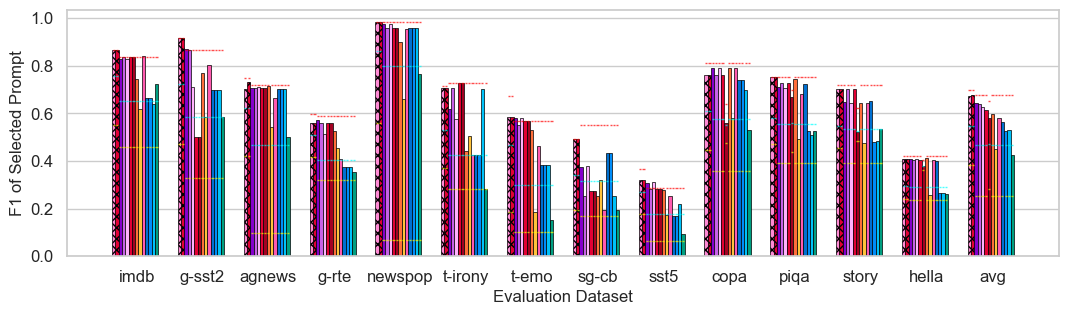

figure_9_legend.pdf


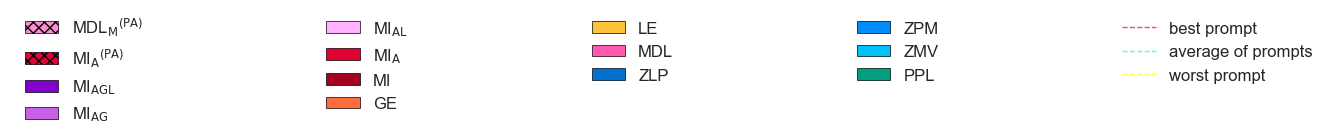

In [12]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict(
    {
        "setup": "v1",
        "cali_type": "ours",
        "cali_norm_type": "softmax",
        "do_filter": False,
    }
)
method_order = newmain_method_order

df = get_for_baseline(
    ps_dict,
    method_order=method_order,
    no_udynamic=no_udynamic,
    add_task_average=add_task_average,
    only_nn=False,
)

options = dict(
    df=df,
    bar_width=0.05,
    legend_width=17,
    xlabel="task",
    index_order=task_order + ["avg"],
    column_order=method_order,
    columns="method",
    index="task",
    method_axis="columns",
    color_fn=lambda idx, col: method_color_map[col],
    hatch_fn=lambda idx, col: method_hatch_map[col],
    title="",
    add_lines=True,
    pnames=["acc", "f1"],
    figsize=(12.8, 3.2),
    ylim=None,
    figname="figure_9",
)
draw_bar(**options)